In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Dropping Variables Manually

Since the majority of convicts are male, a lot of variable groups (CST, SP, etc.) have rows which add up to close to 1. We can therefore drop a reference variable (or variables with negligible values) in each of these groups. I also drop helper variables (area, habitual_offenders) which I used to create variables of interest. 

In [2]:
prison_df = pd.read_csv("Data/tidy_df.csv")
prison_2012 = prison_df.query("year==2012"). \
loc[:,prison_df.columns.str.contains("Female")==False]

prison_2012_shrt=prison_2012. \
filter(prison_2012.loc[:,prison_2012.columns.str.contains("16-18")==False]). \
drop(["CST-prop-Others-Male","IPC-prop-Unknown-Total 18-30 years", 
                  "IPC-prop-Unknown-Total 30-50 years", "IPC-prop-Unknown-Total Above 50 years",
                  "JWP-prop-Others", "JWP-prop-Women Jail","REL-prop-Others-Male",
                  "computer_course", "elementary_education",
                  "habitual_offenders","year","killed","area","incidence"],axis=1). \
assign(convict_prop = lambda df: df["convicts_admitted"]/df["pop_2011"]). \
drop(["convicts_admitted","pop_2011"],axis=1)

prison_2012_shrt

,state_name,recidiv_ratio,CST-prop-OBC-Male,CST-prop-SC-Male,CST-prop-ST-Male,SP-prop-life-Male-age_18_30_years,SP-prop-light-Male-age_18_30_years,SP-prop-long-Male-age_18_30_years,SP-prop-med-Male-age_18_30_years,SP-prop-life-Male-age_30_50_years,...,adult_education,higher_education,inmates_trained,financial_assistance_provided,rehabilitated,legal_aid_provided,injured,region,dens,convict_prop
11,Andhra Pradesh,0.136907,0.241423,0.189750,0.094452,0.205845,0.056120,0.024142,0.037061,0.368488,...,19539,514,1993.0,79,31,2402,0,Southern,308.272520,0.000196
15,Arunachal Pradesh,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,...,0,0,7.0,0,0,6,0,Northeastern,16.510168,0.000007
28,Assam,0.058550,0.260252,0.196215,0.148265,0.124606,0.026183,0.116088,0.020189,0.323344,...,1423,51,267.0,196,99,22,0,Northeastern,397.374640,0.000069
41,Bihar,0.008611,0.495618,0.136319,0.045521,0.138997,0.020204,0.076193,0.029455,0.330088,...,2871,12,1878.0,76,1,563,17,North Central,1102.392978,0.000077
43,Chhattisgarh,0.017421,0.333836,0.211100,0.301811,0.257545,0.016767,0.109323,0.026157,0.298793,...,839,239,1040.0,5,0,1261,0,Central,188.919351,0.000139
66,Goa,0.029630,0.117647,0.051471,0.066176,0.169118,0.044118,0.125000,0.066176,0.250000,...,0,6,117.0,7,34,241,0,Western,393.766343,0.000093
79,Gujarat,0.000000,0.301145,0.165731,0.212666,0.086234,0.036829,0.131148,0.035257,0.255333,...,2082,1348,5737.0,86,114,3370,0,Western,308.042015,0.000114
90,Haryana,0.023272,0.223996,0.251604,0.037756,0.184599,0.018206,0.156544,0.034472,0.213849,...,605,655,602.0,0,224,1747,15,Northern,582.490749,0.000170
103,Himachal Pradesh,0.000000,0.081933,0.303571,0.042017,0.087185,0.012605,0.153361,0.042017,0.226891,...,42,22,124.0,0,3,332,0,Northern,123.156809,0.000090
116,Jammu & Kashmir,0.002217,0.056555,0.151671,0.064267,0.133676,0.010283,0.089974,0.074550,0.321337,...,182,61,517.0,0,108,201,1,Northern,297.079283,0.000036


## Population Density and Convict Proportion

When convict proportion is low, especially in low-density regions, I'd expect the recidivism rate to be highly variable. It appears that recividism generally declines after a certain convict proportion is reached (other than an outlier, low-density Mizoram).

**Color points in first scatterplot by density groups**
**

In [6]:
prison_2012_shrt.query("convict_prop>0.001")

,state_name,recidiv_ratio,CST-prop-OBC-Male,CST-prop-SC-Male,CST-prop-ST-Male,SP-prop-life-Male-age_18_30_years,SP-prop-light-Male-age_18_30_years,SP-prop-long-Male-age_18_30_years,SP-prop-med-Male-age_18_30_years,SP-prop-life-Male-age_30_50_years,...,adult_education,higher_education,inmates_trained,financial_assistance_provided,rehabilitated,legal_aid_provided,injured,region,dens,convict_prop
208,Mizoram,0.102733,0.0,0.034483,0.934169,0.053292,0.191223,0.062696,0.131661,0.031348,...,20,0,75.0,15,0,223,0,Northeastern,51.753427,0.001945


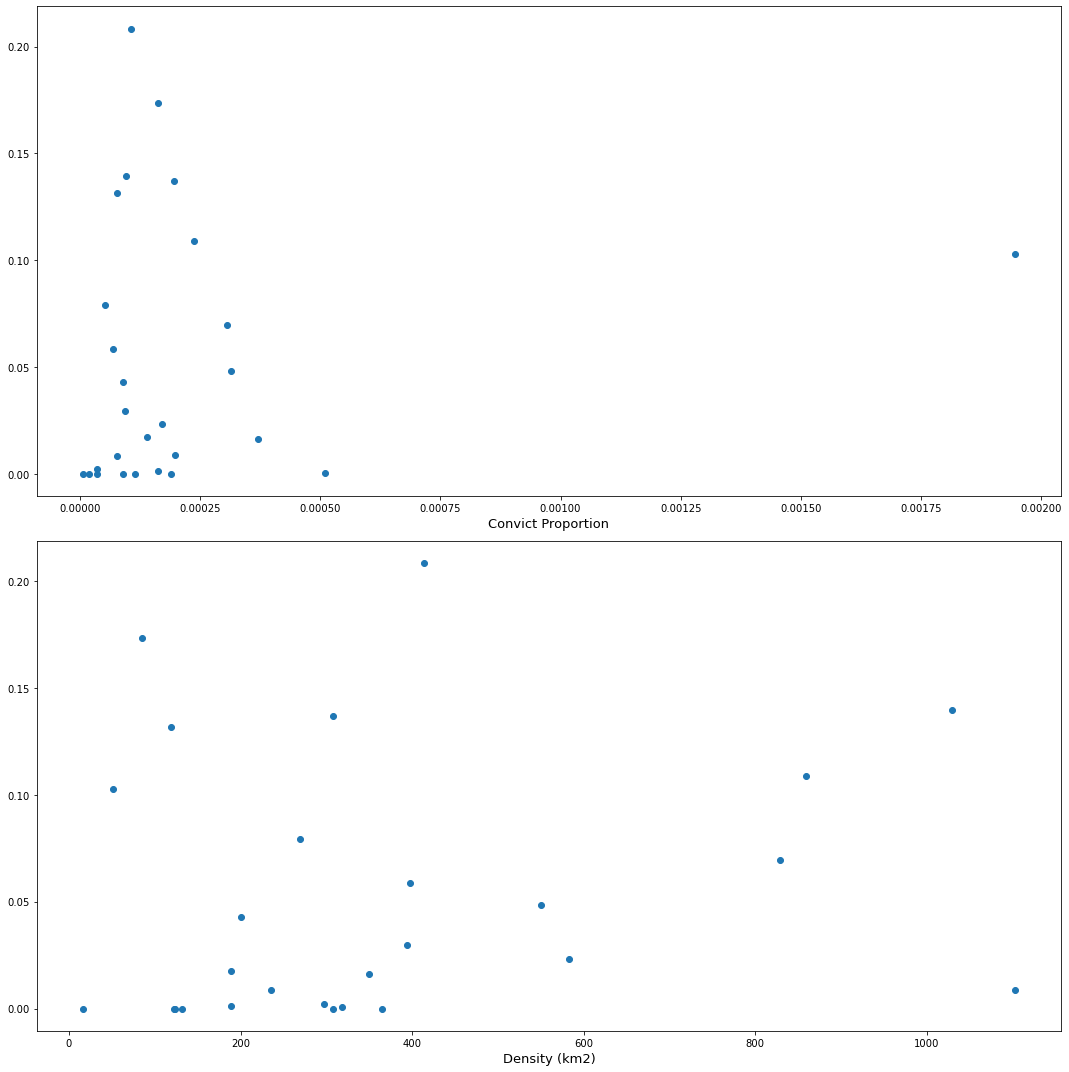

In [112]:
figure, ax = plt.subplots(2,1,figsize=(15,15))

ax[0].scatter(prison_2012_shrt["convict_prop"],prison_2012_shrt["recidiv_ratio"])
ax[0].set_xlabel("Convict Proportion", size=13)


ax[1].scatter(prison_2012_shrt["dens"], prison_2012_shrt["recidiv_ratio"])
ax[1].set_xlabel("Density (km2)", size=13)

figure.tight_layout()

In [114]:
from scipy import interpolate

def sortDem(var):
    return prison_2012_shrt.sort_values(by=var, inplace=True)

In [115]:
def plotCats(catList, degList, xlabs, incrList):

    numPlots = len(catList)
    fig = plt.figure(1, figsize=(15,15))
    
    cols=2
    rows = numPlots //cols
    rows += numPlots % cols
    pos = range(1,numPlots+1)
    
    for v in range(numPlots):

        ax1 = fig.add_subplot(rows,cols,pos[v])
        sortDem(catList[v])
        ax1.scatter(prison_2012_shrt[catList[v]], prison_2012_shrt["recidiv_ratio"])
        xnew = np.arange(0.01,max(prison_2012_shrt[catList[v]]),incrList[v])
        spl = interpolate.UnivariateSpline(prison_2012_shrt[catList[v]],  
                                           prison_2012_shrt["recidiv_ratio"], k=degList[v])
        ax1.plot(xnew,spl(xnew))
        ax1.set_xlabel(xlabs[v], size=13)
        


## Religion

I hypothesize that more heterogeneity among religion may cause higher recidivism rates due to heightened tensions between religious groups (most commonly in the news, Muslims and Hindus). With Christians and Hindus, fitted spline curves imply that recidivism dips when there are few or many prisoners of those groups. For Sikhs, which are a famously pacifist religion, recididvism appears to lessen as they comprise a larger proportion of the population (other than one outlier).

**We might consider using a diversity metric like Simpson's to quantify diversity within states.**

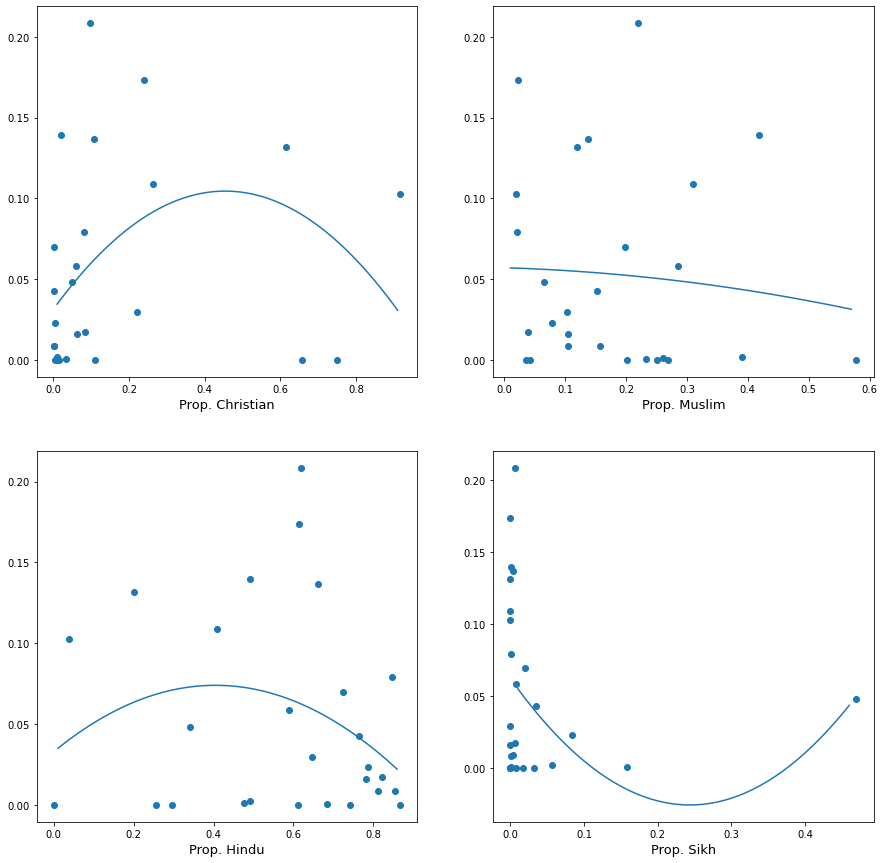

In [118]:
RELlist = ['REL-prop-Christian-Male','REL-prop-Muslim-Male','REL-prop-Hindu-Male', 'REL-prop-Sikh-Male']
RELdegs = [2,2,2,2]
RELlabs = ["Prop. Christian", "Prop. Muslim", "Prop. Hindu", "Prop. Sikh"]
RELincrs = [0.01,0.01,0.01,0.01]
plotCats(RELlist,RELdegs,RELlabs,RELincrs)

## Caste

It is difficult to tell the effects of caste on recidivism; it appears that as the proportion of SC members increases, recidivism decreases. This may because policing is worse in SC-heavy areas, or that in wealthier areas, SCs are scapegoated and heavily policed.

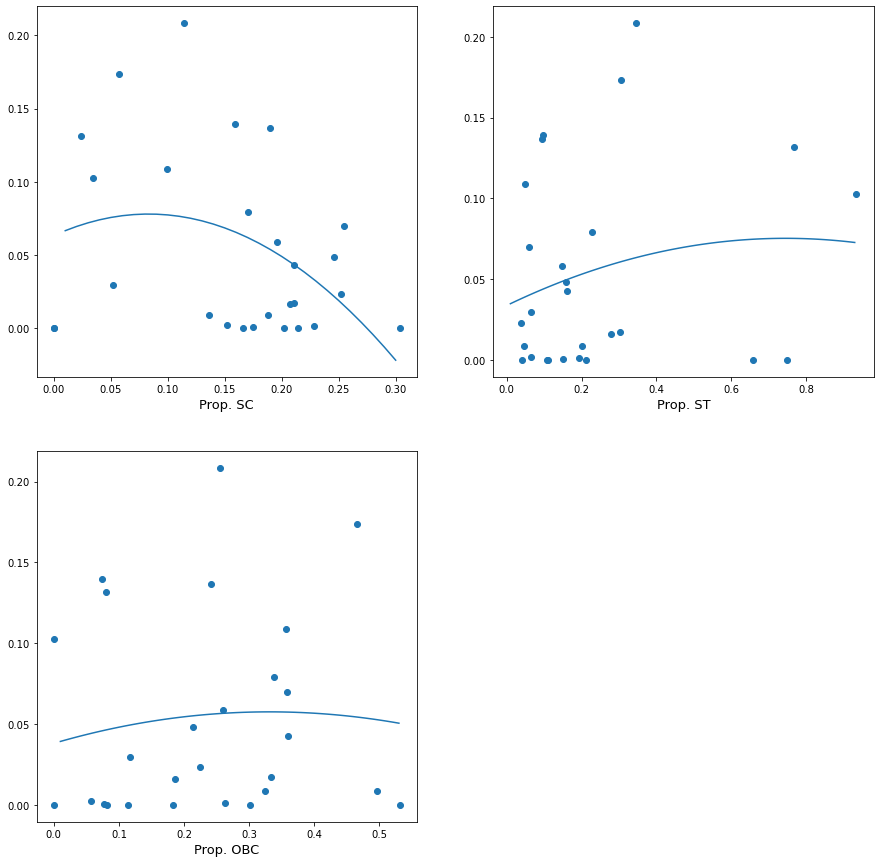

In [119]:
RELlist = ["CST-prop-SC-Male","CST-prop-ST-Male","CST-prop-OBC-Male"]
RELdegs = [2,2,2]
RELlabs = ["Prop. SC", "Prop. ST", "Prop. OBC"]
RELincrs = [0.01,0.01,0.01]
plotCats(RELlist,RELdegs,RELlabs,RELincrs)

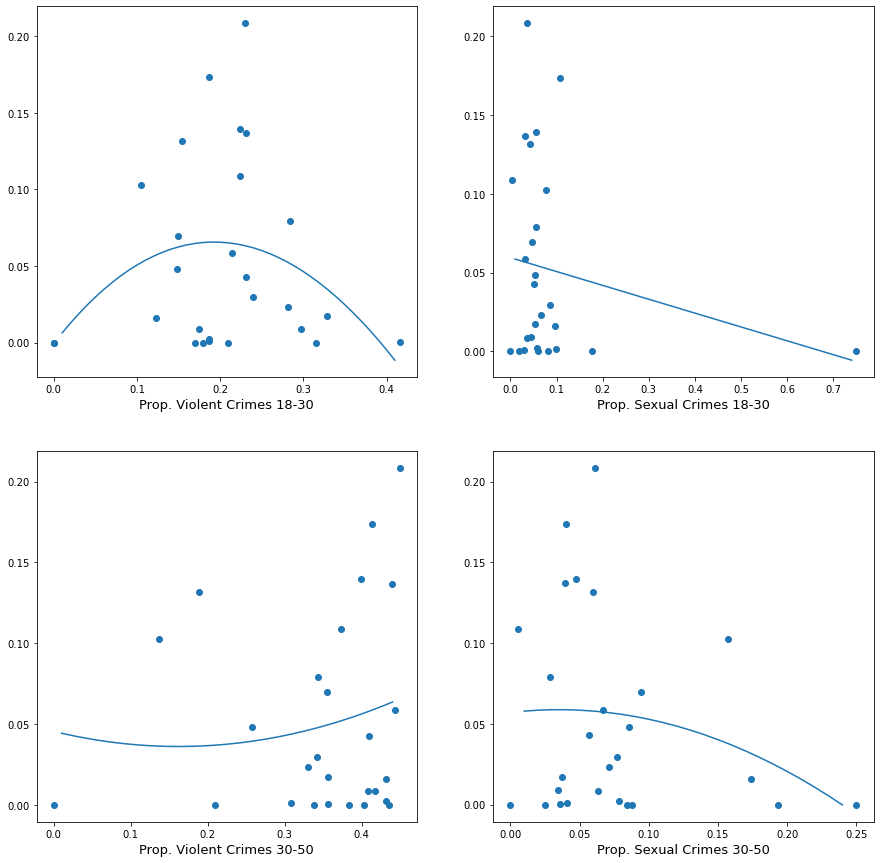

In [120]:
RELlist = ["IPC-prop-Violent-Total 18-30 years","IPC-prop-Sexual-Total 18-30 years",
           "IPC-prop-Violent-Total 30-50 years","IPC-prop-Sexual-Total 30-50 years"
           ]
RELdegs = [3,1,2,2]
RELlabs = ["Prop. Violent Crimes 18-30", "Prop. Sexual Crimes 18-30", "Prop. Violent Crimes 30-50", "Prop. Sexual Crimes 30-50"]
RELincrs = [0.01,0.01,0.01,0.01]
plotCats(RELlist,RELdegs,RELlabs,RELincrs)